<a href="https://colab.research.google.com/github/DavideBruni/CIDL_lab/blob/main/Lecture1/Es2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
class PointsDataset(torch.utils.data.Dataset):
  def __init__(self, path):
    self.data = []
    with open(path, 'r') as f:
            for line in f:
                x, y, c = line.split()
                self.data.append(torch.tensor([float(x), float(y), float(c)]))

  def __len__(self):
      return len(self.data)

  def __getitem__(self, idx):
      return self.data[idx]

In [ ]:
# Test
ds = PointsDataset('dataset2.txt')
print(ds[0])
print(len(ds))

tensor([0.6695, 0.8945, 0.0000])
1000


In [ ]:
class PolynomialModule(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.a = torch.nn.Parameter(torch.rand(1))
    self.b = torch.nn.Parameter(torch.rand(1))
    self.c = torch.nn.Parameter(torch.rand(1))
    self.d = torch.nn.Parameter(torch.rand(1))
    self.e = torch.nn.Parameter(torch.rand(1))

  def forward(self, x):
    return self.a*x.pow(4) + self.b*x.pow(3) + self.c*x.pow(2) + self.d*x + self.e

In [ ]:
from tqdm import trange
# Training
model = PolynomialModule()
dl = torch.utils.data.DataLoader(
    dataset = ds,
    batch_size=32,
    shuffle=True
)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
for epoch in trange(epochs):
    for batch in dl:
        x = batch[:, 0]
        y = batch[:, 1]
        c = batch[:, 2]
        y_pred = model(x)

        predicted_above = y_pred > y    # 1 only if true
        actual_above = c == 1

        predicted_below = y_pred < y    # 1 only if true
        actual_below = c == 0           # 1 if c == 0

        errors = torch.abs(y_pred - y)
        errors[predicted_above == actual_above] = 0
        errors[predicted_below == actual_below] = 0

        loss = torch.mean(errors)
        optimizer.zero_grad()   # set to 0 the gradients, in order to avoid unwanted results
        loss.backward()         # backpropagation using chain ruls
        optimizer.step()        # weights update

100%|██████████| 1000/1000 [00:19<00:00, 51.61it/s]


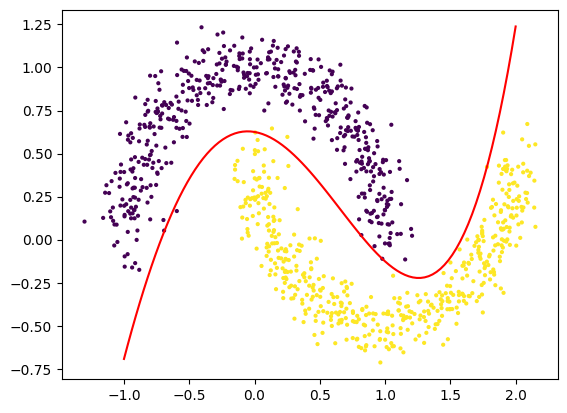

In [ ]:
import matplotlib.pyplot as plt
ds = PointsDataset("dataset2.txt")
xx = torch.linspace(-1, 2, 100)
yy = model(xx)

data = torch.stack(ds.data, dim=0)
plt.plot(xx, yy.detach(), c="r")
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], s=4)
plt.show()